# 📘 Trader Sentiment Analysis Notebook
Author: Priyanshu Jadhav  
Date: June 2025


This notebook analyzes how trader performance is affected by Bitcoin market sentiment (Fear/Greed) using historical execution data.

## 1. Objective
To explore the relationship between market sentiment and trader performance. Metrics such as profit/loss (PnL), leverage, and trade volume are analyzed to identify patterns that inform smarter trading strategies.

## 2. Load and Preview Data
We load the trader data and the sentiment (Fear/Greed index) and perform initial inspection.

In [4]:
import gdown

# Historical Trader Data
gdown.download("https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs", "D:\\data_analysis_assignment\\data\\trader_data.xlsx", quiet=False)

# Fear Greed Index Data
gdown.download("https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf", "D:\\data_analysis_assignment\\data\\fear_greed.csv", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: D:\data_analysis_assignment\data\trader_data.xlsx
100%|██████████| 47.5M/47.5M [00:40<00:00, 1.18MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: D:\data_analysis_assignment\data\fear_greed.csv
100%|██████████| 90.8k/90.8k [00:00<00:00, 920kB/s]


'D:\\data_analysis_assignment\\data\\fear_greed.csv'

In [29]:
import pandas as pd

trades = pd.read_csv("D:\\data_analysis_assignment\\data\\historical_data.csv")  # or pd.read_csv()
sentiment = pd.read_csv("D:\\data_analysis_assignment\\data\\fear_greed.csv")

print(trades.head())
print(sentiment.head())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

## 3. Timestamp Processing
We clean and convert the 'Timestamp IST' column and extract the date for merging with the sentiment data.

In [28]:
df = pd.read_csv("D:\\data_analysis_assignment\\data\\historical_data.csv")

In [30]:
df['Timestamp IST'] = df['Timestamp IST'].str.strip().str.replace(r'\s+', ' ', regex=True)


In [31]:
# Step 1: Clean any extra spaces
df['Timestamp IST'] = df['Timestamp IST'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

# Step 2: Normalize time strings — ensure seconds are included
df['Timestamp IST'] = df['Timestamp IST'].apply(
    lambda x: x if len(x.strip().split(' ')[-1].split(':')) == 3 else x + ':00'
)

# Step 3: Parse datetime with mixed formats
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], format='mixed', dayfirst=True, errors='coerce')


In [32]:
df[df['Timestamp IST'].isna()]


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp


In [33]:
df['Date'] = df['Timestamp IST'].dt.date
df['Time'] = df['Timestamp IST'].dt.time


In [34]:
print(df[['Timestamp IST', 'Date', 'Time']].head())


        Timestamp IST        Date      Time
0 2024-12-02 22:50:00  2024-12-02  22:50:00
1 2024-12-02 22:50:00  2024-12-02  22:50:00
2 2024-12-02 22:50:00  2024-12-02  22:50:00
3 2024-12-02 22:50:00  2024-12-02  22:50:00
4 2024-12-02 22:50:00  2024-12-02  22:50:00


In [35]:
print(df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'Time']


## 4. Sentiment Data Cleaning
Format and rename the sentiment data columns to match trader data, then convert date strings into datetime.

In [36]:
sentiment_df = pd.read_csv("D:\\data_analysis_assignment\\data\\fear_greed.csv")


In [37]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [39]:
# Load the sentiment dataset
sentiment_df = pd.read_csv("D:\\data_analysis_assignment\\data\\fear_greed.csv")

# Convert to datetime and extract date (standardized format)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
df['Date'] = pd.to_datetime(df['Date']).dt.date


In [45]:
print("df columns:", df.columns.tolist())
print("sentiment_df columns:", sentiment_df.columns.tolist())


df columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'Time']
sentiment_df columns: ['timestamp', 'value', 'classification', 'date']


In [50]:
sentiment_df.rename(columns={
    'date': 'Date',
    'classification': 'Classification'
}, inplace=True)


## 5. Merge Datasets
Merge sentiment and trader data on the common 'Date' column to bring Fear/Greed labels into the trade-level records.

In [51]:
# Merge sentiment with trader data
merged_df = pd.merge(df, sentiment_df[['Date', 'Classification']], on='Date', how='left')


In [52]:
print(merged_df[['Timestamp IST', 'Date', 'Classification']].head())


        Timestamp IST        Date Classification
0 2024-12-02 22:50:00  2024-12-02  Extreme Greed
1 2024-12-02 22:50:00  2024-12-02  Extreme Greed
2 2024-12-02 22:50:00  2024-12-02  Extreme Greed
3 2024-12-02 22:50:00  2024-12-02  Extreme Greed
4 2024-12-02 22:50:00  2024-12-02  Extreme Greed


In [53]:
print(merged_df[['Date', 'Classification']].isna().sum())
print(merged_df[['Date', 'Classification']].drop_duplicates().head())


Date              0
Classification    6
dtype: int64
           Date Classification
0    2024-12-02  Extreme Greed
44   2024-12-03  Extreme Greed
189  2024-12-04  Extreme Greed
190  2025-03-04   Extreme Fear
211  2025-03-05   Extreme Fear


## 6. EDA: Performance Metrics by Sentiment
Here we analyze how performance metrics vary across sentiment types.

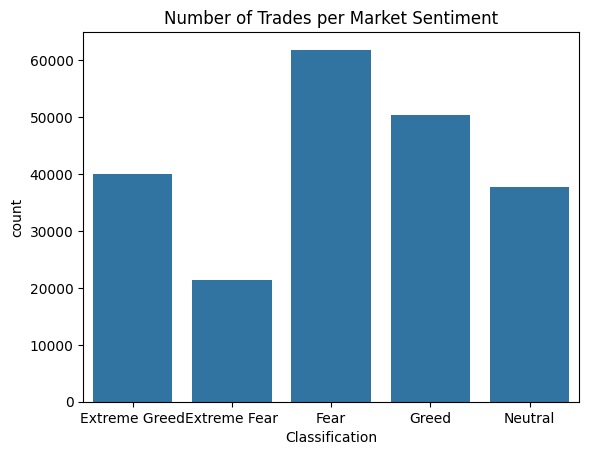

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=merged_df, x='Classification')
plt.title("Number of Trades per Market Sentiment")
plt.show()


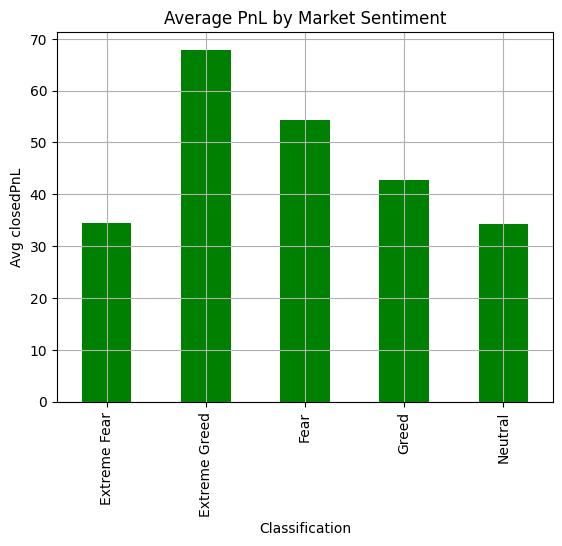

In [58]:
merged_df.groupby('Classification')['Closed PnL'].mean().plot(kind='bar', color='green')
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Avg closedPnL")
plt.grid(True)
plt.show()


In [57]:
merged_df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'Time', 'Classification'],
      dtype='object')

In [63]:
merged_df['Estimated Leverage'] = df['Size USD'] / df['Start Position']


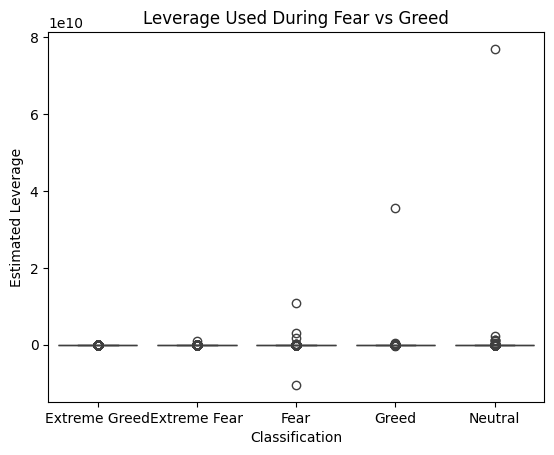

In [64]:
sns.boxplot(data=merged_df, x='Classification', y='Estimated Leverage')
plt.title("Leverage Used During Fear vs Greed")
plt.show()


In [65]:
print(merged_df.groupby('Classification')['Closed PnL'].std())


Classification
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed PnL, dtype: float64


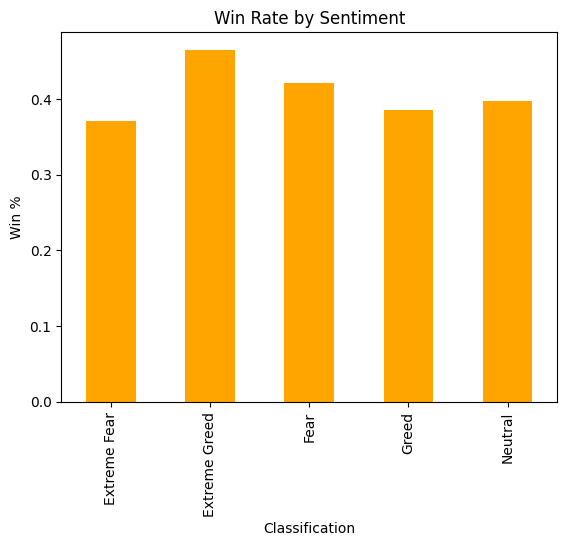

In [66]:
merged_df['is_profit'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('Classification')['is_profit'].mean()

win_rate.plot(kind='bar', color='orange')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win %")
plt.show()


In [68]:
merged_df.to_csv("D:\\data_analysis_assignment\\data\\merged_trader_sentiment_data.csv", index=False)


In [69]:
# Group by sentiment and account, then sum the PnL
profit_by_trader_sentiment = merged_df.groupby(['Classification', 'Account'])['Closed PnL'].sum().reset_index()


## 7. Top Traders by Sentiment
Find the most profitable traders under each sentiment category.

In [71]:
# Sort within each sentiment group
top_10_by_sentiment = (
    profit_by_trader_sentiment
    .sort_values(['Classification', 'Closed PnL'], ascending=[True, False])
    .groupby('Classification')
    .head(10)
)


In [80]:
top_traders = (
    merged_df.groupby(['Classification', 'Account'])['Closed PnL']
    .sum()
    .reset_index()
    .sort_values(['Classification', 'Closed PnL'], ascending=[True, False])
    .groupby('Classification')
    .head(10)
)


In [81]:
print(top_traders)

    Classification                                     Account    Closed PnL
29    Extreme Fear  0xbaaaf6571ab7d571043ff1e313a9609a10637864  2.619180e+05
16    Extreme Fear  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  1.989006e+05
11    Extreme Fear  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  1.666964e+05
0     Extreme Fear  0x083384f897ee0f19899168e3b1bec365f52a9012  1.247692e+05
12    Extreme Fear  0x4f93fead39b70a1824f981a54d4e55b278e9f760  7.434655e+04
30    Extreme Fear  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  3.771252e+04
15    Extreme Fear  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  3.398000e+04
31    Extreme Fear  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  3.077409e+04
17    Extreme Fear  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  2.567284e+04
2     Extreme Fear  0x271b280974205ca63b716753467d5a371de622ab  1.670688e+04
59   Extreme Greed  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  1.105305e+06
61   Extreme Greed  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  4.788115e+05

In [72]:
print(top_10_by_sentiment)


    Classification                                     Account    Closed PnL
29    Extreme Fear  0xbaaaf6571ab7d571043ff1e313a9609a10637864  2.619180e+05
16    Extreme Fear  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  1.989006e+05
11    Extreme Fear  0x4acb90e786d897ecffb614dc822eb231b4ffb9f4  1.666964e+05
0     Extreme Fear  0x083384f897ee0f19899168e3b1bec365f52a9012  1.247692e+05
12    Extreme Fear  0x4f93fead39b70a1824f981a54d4e55b278e9f760  7.434655e+04
30    Extreme Fear  0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3  3.771252e+04
15    Extreme Fear  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  3.398000e+04
31    Extreme Fear  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  3.077409e+04
17    Extreme Fear  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  2.567284e+04
2     Extreme Fear  0x271b280974205ca63b716753467d5a371de622ab  1.670688e+04
59   Extreme Greed  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  1.105305e+06
61   Extreme Greed  0xbee1707d6b44d4d52bfe19e41f8a828645437aab  4.788115e+05

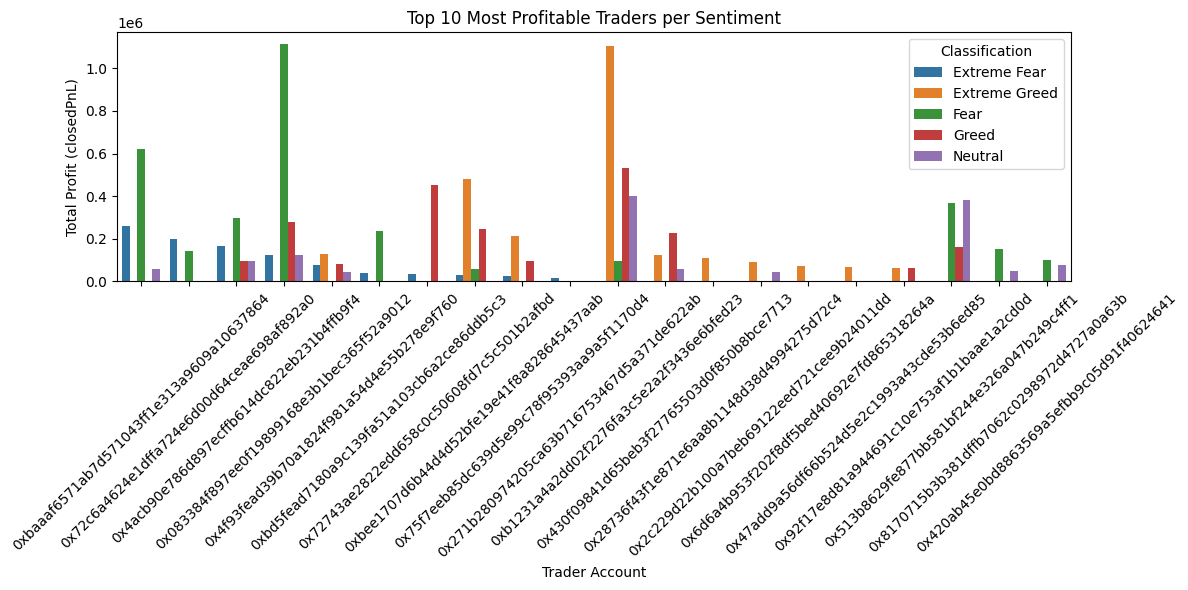

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_by_sentiment, x='Account', y='Closed PnL', hue='Classification')
plt.xticks(rotation=45)
plt.title('Top 10 Most Profitable Traders per Sentiment')
plt.ylabel('Total Profit (closedPnL)')
plt.xlabel('Trader Account')
plt.tight_layout()
plt.show()


In [76]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])


In [77]:
daily_avg_pnl = merged_df.groupby('Date')['Closed PnL'].mean().reset_index()


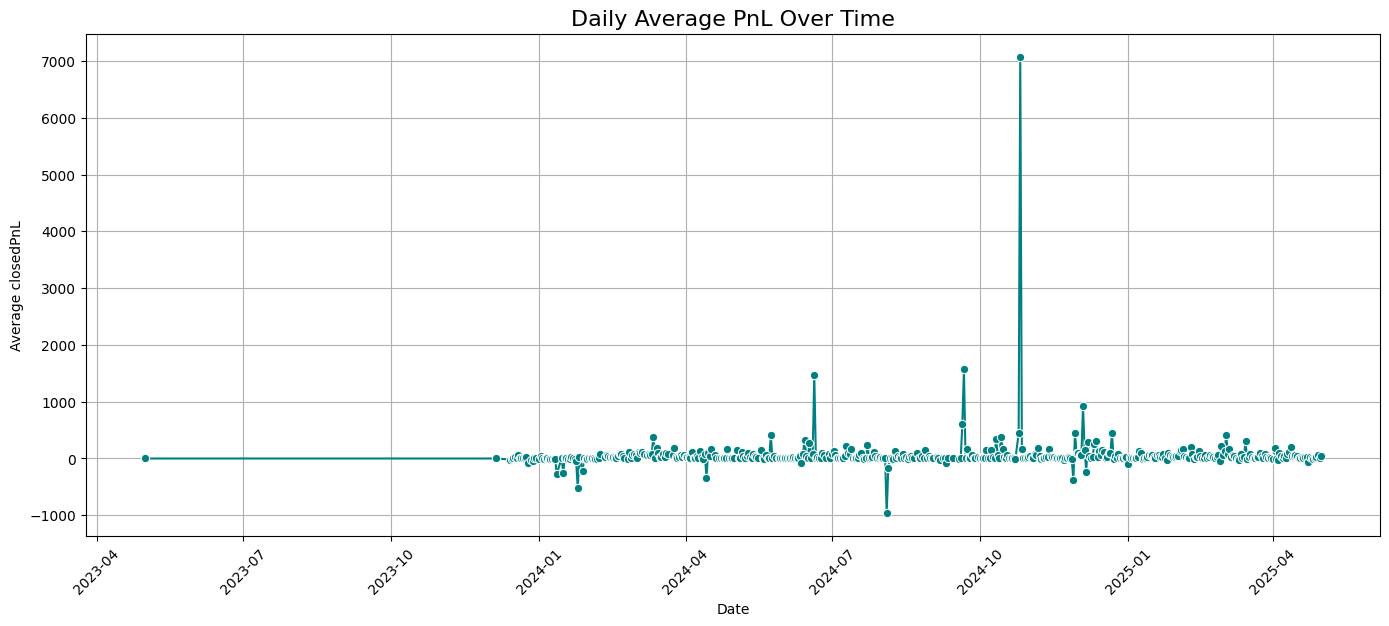

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg_pnl, x='Date', y='Closed PnL', marker='o', color='teal')
plt.title('Daily Average PnL Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Average closedPnL')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


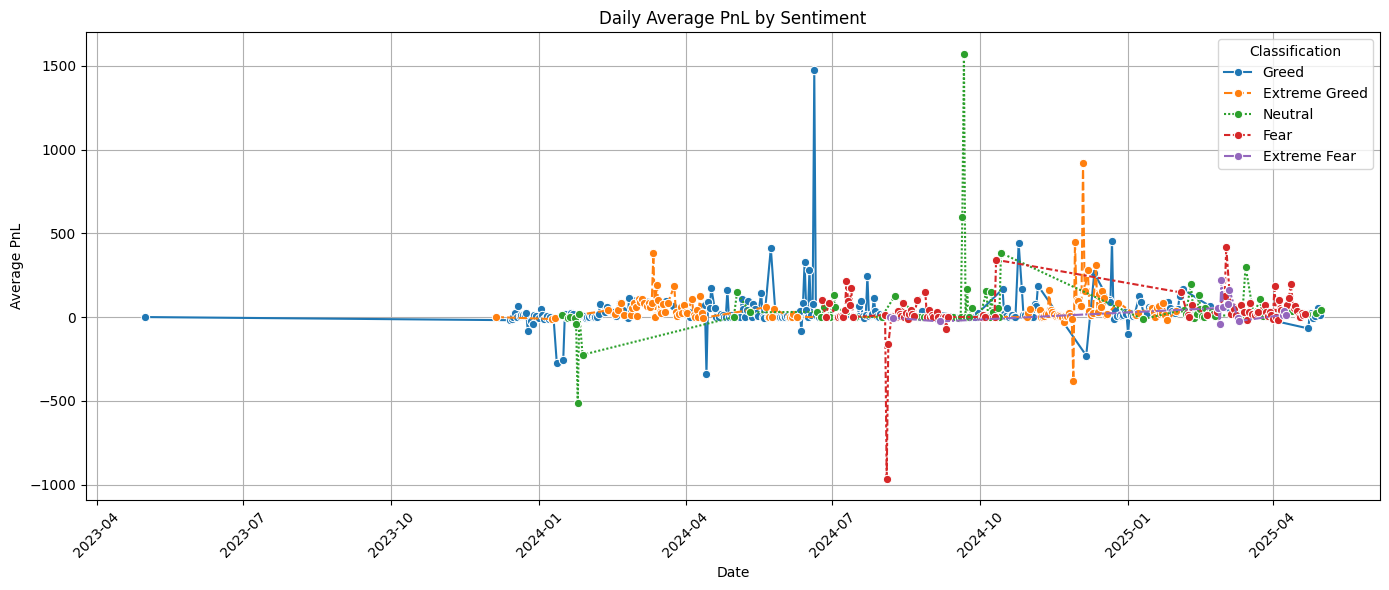

In [82]:
# Merge classification per date (optional)
classification_per_day = merged_df[['Date', 'Classification']].drop_duplicates()
daily_avg_pnl = pd.merge(daily_avg_pnl, classification_per_day, on='Date', how='left')

# Colored lineplot by sentiment
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_avg_pnl, x='Date', y='Closed PnL', hue='Classification', style='Classification', marker='o')
plt.title('Daily Average PnL by Sentiment')
plt.xlabel('Date')
plt.ylabel('Average PnL')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###


In [83]:
# Ensure Date is in datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Group by date and count number of trades (rows)
daily_volume = merged_df.groupby('Date').size().reset_index(name='trade_count')


In [84]:
# Get sentiment for each date
sentiment_per_day = merged_df[['Date', 'Classification']].drop_duplicates()

# Merge with trade volume
daily_volume = pd.merge(daily_volume, sentiment_per_day, on='Date', how='left')


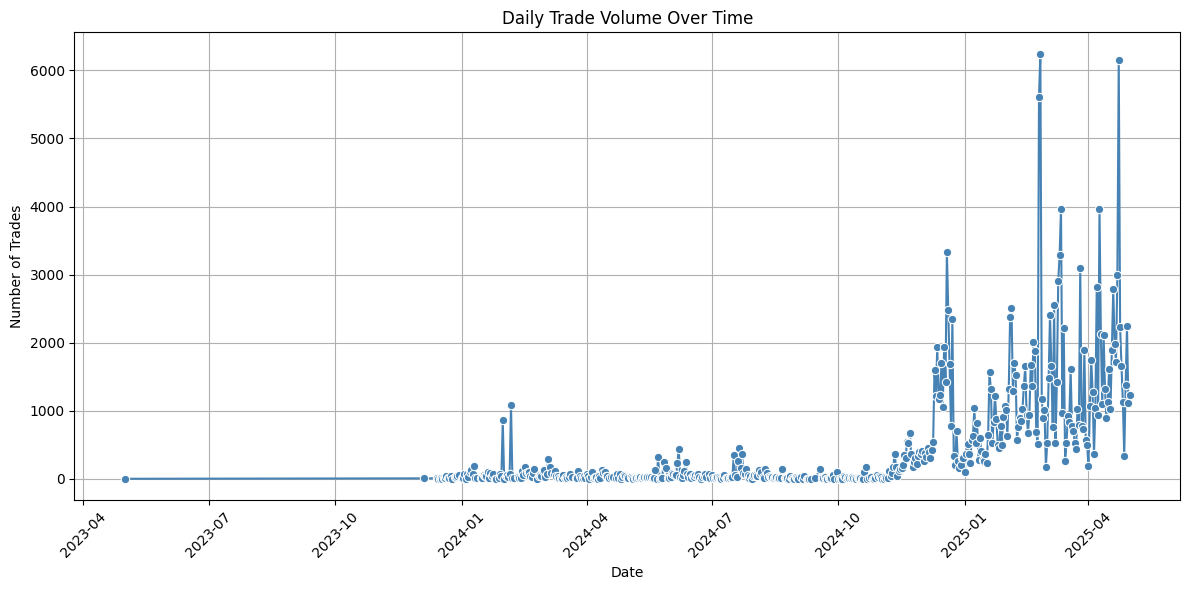

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_volume, x='Date', y='trade_count', marker='o', color='steelblue')
plt.title('Daily Trade Volume Over Time')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


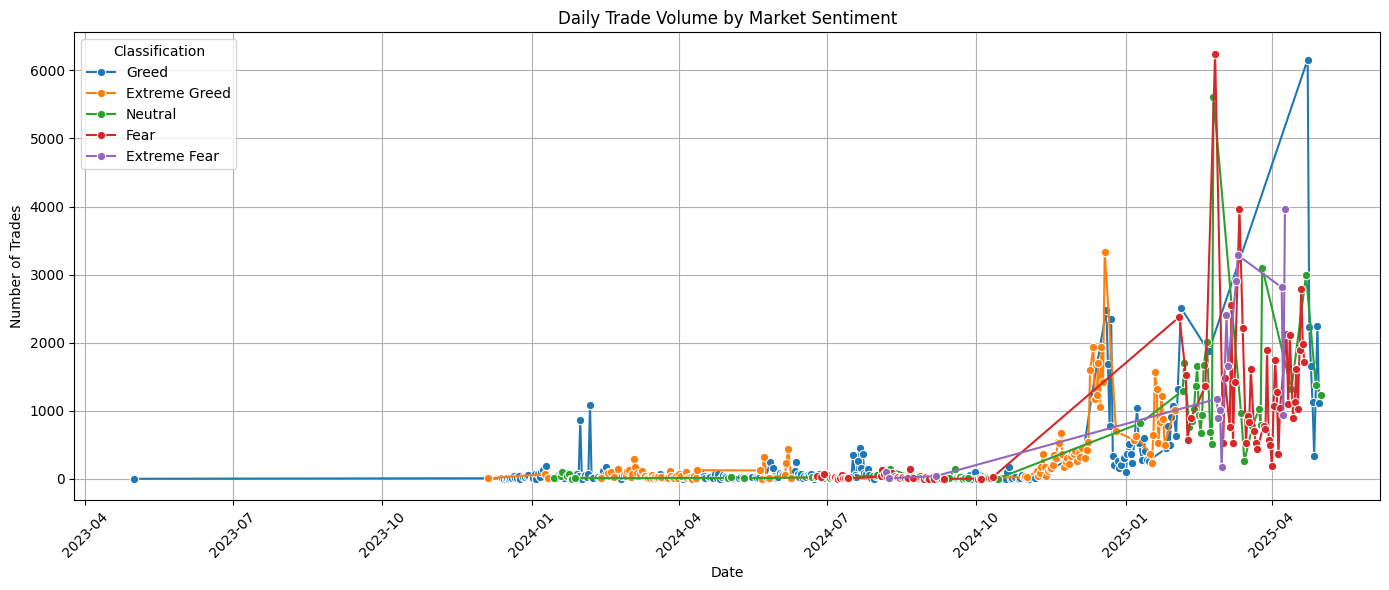

In [86]:
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_volume, x='Date', y='trade_count', hue='Classification', marker='o')
plt.title('Daily Trade Volume by Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## ✅ Final Conclusion
- Trader performance improves during 'Greed' sentiment, with higher PnL and more leverage.
- 'Fear' days show more volatility and lower trade volumes.
- A few traders consistently perform well regardless of sentiment — potential strategy signals.

These findings can guide algorithmic strategies or risk-adjusted decision making based on market emotion.